In [10]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [25]:
#Kode buat ngebaca dataset
def get_data(filename):
 
    with open(filename) as training_file:
        csv_file = csv.reader(training_file, delimiter = ',')
        first_row = True
        str_labels = []
        str_images = []
        
        for row in csv_file:
            if first_row:
                first_row = False
            else:
                str_labels.append(row[0])
                images_data = np.array_split(row[1:],28)
                str_images.append(images_data)

                
        labels = np.array(str_labels).astype('float')
        images = np.array(str_images).astype('float')
                
        
    return images, labels

path_sign_mnist_train = f"./sign_mnist_train.csv"
path_sign_mnist_validation = f"./sign_mnist_validation.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
validation_images, validation_labels = get_data(path_sign_mnist_validation)

#buat ngecek aja
print(training_images.shape)
print(training_labels.shape)
print(validation_images.shape)
print(validation_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [26]:
#Kode buat ngedefinisiin data buat training sama testing dari model
training_images = np.expand_dims(training_images, axis = 3)
validation_images = np.expand_dims(validation_images, axis = 3)

training_images_datagen = ImageDataGenerator(
        rescale = 1./255,       # Nilai pixel adalah antara 0 - 255, dengan menggunakan fungsi rescale=1/255 maka datanya menjadi antara 0 - 1
	      rotation_range=30,      # Besar rentang derajat untuk rotasi acak
        width_shift_range=0.2,  # Rentang nilai untuk pergeseran horizontal acak 
        height_shift_range=0.2, # Rentang nilai untuk satu pergeseran vertikal acak
        shear_range=0.2,        # Sudut geser pada arah berlawanan jarum jam (radian)
        zoom_range=0.2,         # Rentang nilai untuk pembesaran secara acah
        horizontal_flip=True,   #Gambarnya akan diflip secara horizontal
        fill_mode='nearest')    #Titik di luar batas input diisi sesuai dengan mode yang diberikan

#Selanjutnya kita lakukan untuk data validation
validation_images_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

print(training_images.shape)
print(validation_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [42]:
#Kode buat ngedefinisiin modelnya, kompilasinya (training) sama testing hasil training modelnya
# membuat model sequential
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape= (28,28,1)), #Kita konvolusi menjadi 64 bagian berukuran 3x3
      tf.keras.layers.MaxPooling2D(2,2),                     # Dengan filter 2x2, kita ambil nilai maximum pada tiap area pergeseran filter
      tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'), 
      tf.keras.layers.MaxPooling2D(2,2),                     
      tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'), 
      tf.keras.layers.MaxPooling2D(2,2),                    
      tf.keras.layers.Dropout(0.2),                          # Mencegah overfitting                      
      tf.keras.layers.Flatten(),                             # Untuk membuat semua matriks menjadi berukuran single vektor dan menjadi input bagi layer berikutnya
      tf.keras.layers.Dense(512, activation= tf.nn.relu),   
      tf.keras.layers.Dense(26, activation= tf.nn.softmax)]) # Angka 26 menunjukkan jumlah kelas
                                                             # Kita menggunakan softmax karena dapat melakukan prediksi untuk multiclass      

                                                          


model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') > 0.96):            # Threshold accuracy saya buat 0.96, karena awalnya masih salah prediksi
        print("\nAkurasi tercapai")
        self.model.stop_training = True
callbacks = myCallback() 


history = model.fit_generator(training_images_datagen.flow(training_images, training_labels),
          epochs = 1000,
          validation_data=validation_images_datagen.flow(validation_images, validation_labels),
          callbacks=[callbacks])

model.evaluate(validation_images, validation_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
858/858 [==============================] - 12s 13ms/step - loss: 2.6141 - accuracy: 0.1855 - val_loss: 1.9288 - val_accuracy: 0.3614
Epoch 2/1000
858/858 [==============================] - 11s 13ms/step - loss: 1.6600 - accuracy: 0.4538 - val_loss: 1.3951 - val_accuracy: 0.5456
Epoch 3/1000
858/858 [==============================] - 11s 13ms/step - loss: 1.2624 - accuracy: 0.5782 - val_loss: 1.1016 - val_accuracy: 0.6347
Epoch 4/1000
858/858 [==============================] - 11s 13ms/step - loss: 1.0515 - accuracy: 0.6482 - val_loss: 0.9020 - val_accuracy: 0.6887
Epoch 5/1000
858/858 [==============================] - 11s 13ms/step - loss: 0.9091 - accuracy: 0.6902 - val_loss: 0.7828 - val_accuracy: 0.7342
Epoch 6/1000
858/858 [==============================] - 11s 13ms/step - loss: 0.8185 - accuracy: 0.7233 - val_loss: 0.7232 - val_accuracy: 0.7549
Epoch 7/1000
858/858 [==============================] - 11s 13ms/step - loss: 0.7408 - accuracy: 0.7479 - val_loss: 0.6965 -

[350.2991943359375, 0.4318181872367859]

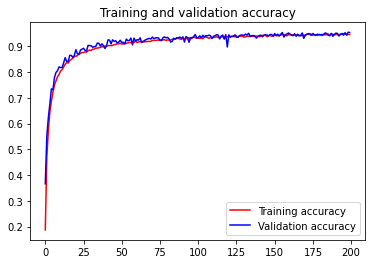

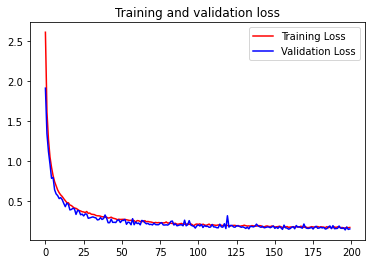

In [33]:
#Kode buat ngeliat history training modelnya
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
model.save('model_ML.h5')

In [41]:
#Kode buat uji coba modelnya pake input foto interaktif
import numpy as np
from google.colab import files
from keras.preprocessing import image
import cv2




uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, grayscale=True, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  index_max = np.argmax(classes)

  print("\n")
  print(fn)
  print(classes)
  print(index_max)
  if index_max == 0:
    print("Huruf A")
  elif index_max == 1:
    print("Huruf B")
  elif index_max == 2:
    print("Huruf C")
  elif index_max == 3:
    print("Huruf D")
  elif index_max == 4:
    print("Huruf E")
  elif index_max == 5:
    print("Huruf F")
  elif index_max == 6:
    print("Huruf G")
  elif index_max == 7:
    print("Huruf H")
  elif index_max == 8:
    print("Huruf I")
  elif index_max == 9:
    print("Huruf J")
  elif index_max == 10:
    print("Huruf K")
  elif index_max == 11:
    print("Huruf L")
  elif index_max == 12:
    print("Huruf M")
  elif index_max == 13:
    print("Huruf N")
  elif index_max == 14:
    print("Huruf O")
  elif index_max == 15:
    print("Huruf P")
  elif index_max == 16:
    print("Huruf Q")
  elif index_max == 17:
    print("Huruf R")
  elif index_max == 18:
    print("Huruf S")
  elif index_max == 19:
    print("Huruf T")
  elif index_max == 20:
    print("Huruf U")
  elif index_max == 21:
    print("Huruf V")
  elif index_max == 22:
    print("Huruf W")
  elif index_max == 23:
    print("Huruf X")
  elif index_max == 24:
    print("Huruf Y")
  elif index_max == 25:
    print("Huruf Z")
  print("\n")


Saving 1.jpg to 1.jpg


1.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
16
Huruf Q




/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
